In [1]:
import os
import json
import pandas as pd
from src.vycisti import vycisti
from src.gender import gender
from src.tabulka import tabulka
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())
with open(os.path.join("data_fixes", "nelide.json"), encoding="utf-8") as nelide:
    nelide = json.loads(nelide.read())
df = vycisti(df, opravy)

2023/06/05 11:29:00 z 4555 řádků odstraněno 133. Aktuální dataframe má 4422 řádků.


In [2]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [3]:
zijici = persony[~persony["Datum narození"].isnull()]
zijici = zijici[zijici["Datum úmrtí"].isnull()]
zijici = zijici["Jméno"].to_list()
len(zijici)

5787

In [4]:
profese = seznamy["profese"]

In [5]:
profese

['Animace',
 'Architekt',
 'Asistent kamery',
 'Asistent režie',
 'Asistent střihu',
 'Asistent vedoucího produkce',
 'Asistent vedoucího výroby',
 'Asistent zvuku',
 'Assistent architekta',
 'Autor komentáře',
 'Autor projektu',
 'Choreografie',
 'Dialogy české verze',
 'Dirigent',
 'Dramaturg',
 'Druhá kamera',
 'Hrají',
 'Hudba k písni',
 'Hudba, text a zpěv písně',
 'Hudební režie',
 'Kamera',
 'Kaskadéři',
 'Komentář',
 'Koordinátor kaskadérů',
 'Kostýmy',
 'Masky',
 'Mluví',
 'Návrhy kostýmů',
 'Návrhy titulků',
 'Odborný poradce',
 'Pedagogické vedení',
 'Pomocná režie',
 'Postprodukce',
 'Producent',
 'Produkce',
 'Původní filmový námět',
 'Režie české verze',
 'Režie',
 'Scénář',
 'Skript',
 'Spolupráce',
 'Střih',
 'Technický scénář',
 'Triky',
 'Vedoucí produkce',
 'Vedoucí výroby',
 'Výběr hudby',
 'Výkonná produkce',
 'Výprava',
 'Výtvarná spolupráce',
 'Výtvarník',
 'Zpívá',
 'Zvláštní efekty',
 'Zvuk',
 'Zástupce vedoucího produkce',
 'Zástupce vedoucího výroby',
 'Účink

In [6]:
def plose_jednoduse(x):
    seznam = []
    for y in x:
        if y == None:
            pass
        if isinstance(y, str):
            if y not in seznam:
                seznam.append(y)
        if isinstance(y, list):
            for z in y:
                if z not in seznam:
                    seznam.append(z)
    return(seznam)

## První filmaři

In [7]:
df[df["Copyright"] == 1898]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby
0,Alarm staroměstských hasičů (401719),Rakousko-Uhersko,1898,1898,premiéra 3. 7. 1898 (Výstava architektury a i...,1.0,[Jan Kříženecký (127419)],film,reportáž,"[dokumentární, distribuční]",Alarm staroměstských hasičů,Alarm staroměstských hasičů,Alarm of Old Town Firemen,Alarm pražských hasičů staroměstských / Poplac...,None,None,None,None,None,None,None,None,[Jan Kříženecký (127419)],None,None,None,None,None,None,None,None,None,None,None,None,"[Praha, Staré Město (Praha), Obecní dvůr /dnes...",None,"[Jan Kříženecký (127419), Josef Pokorný (96687)]",None,[Národní filmový archiv (92324)],None,krátkometrážní,35mm,1.26,černobílý,němý,None,česká,bez dialogů,bez titulků,bez titulků,None,"Poplach hasičů, od poplašného znamení zvoncem ...",None,None,None,None,None,None,None,None,None,17.0,bez titulků,Film byl natočen a promítán v pavilonu Český k...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nedochovaný,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1898,1898
1,Smích a pláč (395110),Rakousko-Uhersko,1898,1898,premiéra 07/1898 (Výstava architektury a inže...,1.0,[Jan Kříženecký (127419)],film,anekdota,"[hraný, distribuční]",Smích a pláč,Smích a pláč,Laughter and Tears,Pláč a smích / Tvář Švába-Malostranského / Sól...,None,[Josef Šváb-Malostranský (55291)],[on sám],None,None,[Josef Šváb-Malostranský (55291)],None,None,[Jan Kříženecký (127419)],None,None,None,None,None,None,None,None,None,None,None,None,"[Praha, Bubeneč (Praha), Výstaviště (Bubeneč)]",None,"[Jan Kříženecký (127419), Josef Pokorný (96687)]",None,[Národní filmový archiv (92324)],[Národní filmový archiv (92324)],krátkometrážní,"[35mm, DCP 2-D]","[1.33, 1.26]",černobílý,němý,None,česká,bez dialogů,bez titulků,bez titulků,None,"Švábova tvář, natočená v detailu, předvádí mim...",None,None,None,None,None,None,None,None,None,17.0,bez titulků,Film byl natočen a promítán v pavilonu Český k...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Non

In [8]:
prvni_filmari = []
pocatky = df[df["Copyright"] <= 1898]
for p in profese:
    profici = pocatky[p].explode(p).drop_duplicates().to_list()
    for p in profici:
        if p:
            if p not in prvni_filmari:
                prvni_filmari.append(p)

In [9]:
prvni_filmari

['Josef Šváb-Malostranský (55291)',
 'Ferdinand Gýra (60351)',
 'Marie Kříženecká (99776)',
 'Jan Kříženecký (127419)']

In [10]:
persony[persony["Jméno"].isin(prvni_filmari)]

,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
5302,Jan Kříženecký (127419),127419,"kameraman, fotograf, výrobce, režisér",fyzická,Jan Nepomuk Josef Norbert Křiženecký (rodné jm...,JAN KŘÍŽENECKÝ (vl. jm. Jan Nepomuk Josef Norb...,1868-03-20T00:00:00.000,"Praha, Rakousko-Uhersko",1921-02-09T00:00:00.000,"Praha, Československo",Praha,Rakousko-Uhersko,Praha,Československo,1868.0,1921.0
20511,Josef Šváb-Malostranský (55291),55291,"scenárista, herec, spisovatel, zpěvák, komik, ...",fyzická,"Josef Malhiáš Johann Šchwab (rodné jméno), Jos...",None,1860-03-16T00:00:00.000,"Praha, Rakouské císařství",1932-10-30T00:00:00.000,"Praha, Československo",Praha,Rakouské císařství,Praha,Československo,1860.0,1932.0
22059,Ferdinand Gýra (60351),60351,neherec,fyzická,"Ferdinand Laštovka (rodné jméno), Ferdinand Gý...",None,1861-03-18T00:00:00.000,"Praha, Rakouské císařství",1933-06-15T00:00:00.000,"Praha, Československo",Praha,Rakouské císařství,Praha,Československo,1861.0,1933.0
32622,Marie Kříženecká (99776),99776,neherečka,fyzická,Marie Gýrová (rodné jméno),None,1868-07-17T00:00:00.000,"Praha, Rakousko-Uhersko",1947-01-05T00:00:00.000,"Praha, Československo",Praha,Rakousko-Uhersko,Praha,Československo,1868.0,1947.0


In [11]:
spolupracovnici_prvnich_filmaru = []
for prvni in prvni_filmari:
    print(prvni)
    for p in profese:
        pracovni = df.explode(p)
        pracovni = pracovni[pracovni[p] == prvni]
        spolupracovnici_prvnich_filmaru.append(pracovni[profese].values.tolist()) 

Josef Šváb-Malostranský (55291)
Ferdinand Gýra (60351)
Marie Kříženecká (99776)
Jan Kříženecký (127419)


In [12]:
spolupracovnici_prvnich_filmaru = plose_jednoduse(plose_jednoduse((plose_jednoduse(spolupracovnici_prvnich_filmaru))))

In [13]:
spolupracovnici_prvnich_filmaru

['Josef Šváb-Malostranský (55291)',
 'Jan Kříženecký (127419)',
 'Antonín Pech (99760)',
 'Václav Münzberger (101857)',
 'Antonín Fencl (75553)',
 'Karel Degl (51547)',
 'Jan S. Kolár (51548)',
 'Jan A. Palouš (123301)',
 'František Macoun (10647)',
 'Zorka Janovská (34099)',
 'Josef Brabec (123295)',
 'Tommy Falley-Novotný (14665)',
 'Hana Temná (95860)',
 'Václav Binovec (37467)',
 'J. Czerny (121893)',
 'Willy Hamburger (112976)',
 'Ferry Nansen (97017)',
 'František Josef Leopold (97138)',
 'Otto Heller (127281)',
 'Leo Marten (51569)',
 'Thea Červenková (73006)',
 'Josef Košák (3827)',
 'Ladislav Novák (34837)',
 'Fritz Kraenke (127621)',
 'Joe Jenčík (124243)',
 'Josef Rovenský (37766)',
 'J. Černý (127612)',
 'Eugen Nicolsen (127610)',
 'Ivan Frank Kubišta (89327)',
 'Josef Skružný (104876)',
 'Bohumír Šimek (125434)',
 'Bohuslav Šula (127389)',
 'Robert Zdráhal (55968)',
 'Přemysl Pražský (56170)',
 'Otokar Vodička (34998)',
 'Karel Lamač (37847)',
 'Otto Hoffmann (127739)',
 '

In [14]:
spolupracovnici_frame = {}
hraji_pracovni = df.explode("Hrají")
for s in spolupracovnici_prvnich_filmaru:
    spolupracovnici_frame[s] = [hraji_pracovni[hraji_pracovni["Hrají"] == s]["Copyright"].max(), persony[persony["Jméno"] == s]["Rok úmrtí"].max()]

In [15]:
spolup_final = pd.DataFrame.from_dict(spolupracovnici_frame, orient="index").rename(columns={0: "Poslední role", 1: "Rok úmrtí"})

In [16]:
spolup_final[(~spolup_final.isnull())].sort_values(by="Rok úmrtí", ascending=False).head(5)

,Poslední role,Rok úmrtí
Lída Baarová (5202),1941.0,2000.0
Antonín Zelenka (4758),1932.0,1993.0
Elmar Klos (4742),1989.0,1993.0
Jaroslav Tuzar (127332),NaN,1988.0
Anny Ondráková (127280),1937.0,1987.0


In [17]:
spolup_final[(~spolup_final.isnull())].sort_values(by="Poslední role", ascending=False).head(5)

,Poslední role,Rok úmrtí
Václav Šťastný,2019.0,NaN
Elmar Klos (4742),1989.0,1993.0
Jaroslav Hilbert (63466),1979.0,1936.0
Antonín Meisner (127732),1975.0,1975.0
Eman Fiala (64088),1966.0,1970.0


In [18]:
spolup_final[~spolup_final.isnull()].shape

(238, 2)

In [19]:
svab = df.explode("Hrají")
svab = svab[svab["Hrají"] == "Josef Šváb-Malostranský (55291)"]["Film"].drop_duplicates().to_list()
baarova = df.explode("Hrají")
baarova = baarova[baarova["Hrají"] == "Lída Baarová (5202)"]["Film"].drop_duplicates().to_list()
spolecni = [x for x in svab if x in baarova]
spolecni

['Kariéra Pavla Čamrdy (395542)']

## Kříženecký

In [20]:
# krizenecky = df.explode("Režie")
# krizenecky = krizenecky[krizenecky["Režie"] == "Jan Kříženecký (127419)"]

In [21]:
# krizenecky["Lidé"] = krizenecky[profese].values.tolist()
# krizenecky["Lidé"] = krizenecky["Lidé"].apply(lambda x: plose_jednoduse(x))

In [22]:
# krizenecky = krizenecky.explode("Lidé")

In [23]:
# lide_krizeneckeho = krizenecky["Lidé"].drop_duplicates()

In [24]:
# lide_krizeneckeho

In [25]:
# lide_krizeneckeho_frame = {}
# for k in lide_krizeneckeho:
#     posledni = 0
#     for p in profese:
#         df_pracovni = df.explode(p)
#         posledni2 = df_pracovni[df_pracovni[p] == k]["Copyright"].max()
#         if posledni2 > posledni:
#             posledni = posledni2
#     lide_krizeneckeho_frame[k] = [posledni, persony[persony["Jméno"] == k]["Rok úmrtí"].max()]

In [26]:
# pd.DataFrame.from_dict(lide_krizeneckeho_frame, orient="index").rename(columns = {0: "Poslední film", 1: "Rok úmrtí"}).sort_values(by="Rok úmrtí",ascending=False)

## Havel

In [27]:
def najdi_cloveka(jmeno):
    
    global profese
    
    nejmensi_rok = 3000
    nejvyssi_rok = 0
    
    for p in profese:
        df_pracovni = df[["Film","Copyright", p]].explode(p)
        if df_pracovni[df_pracovni[p] == jmeno].shape[0] > 0:
            print(df_pracovni[df_pracovni[p] == jmeno])
            nejmensi_rok2 = df_pracovni[df_pracovni[p] == jmeno]["Copyright"].min()
            nejvyssi_rok2 = df_pracovni[df_pracovni[p] == jmeno]["Copyright"].max()
            if nejmensi_rok2 < nejmensi_rok:
                nejmensi_rok = nejmensi_rok2
            if nejvyssi_rok2 > nejvyssi_rok:
                nejvyssi_rok = nejvyssi_rok2
                
    print(f"První rok: {nejmensi_rok}, poslední rok: {nejvyssi_rok}")

In [28]:
najdi_cloveka("Václav Havel (676)")

                                                   Film  Copyright  \
1962                           Každý mladý muž (396663)       1965   
3260                                Kamenný most (9104)       1996   
3261  Co dělat? Cesta z Prahy do Českého Krumlova an...       1996   
3516                                Horem Pádem (22888)       2004   
3804                                  Odcházení (56870)       2011   
3806                            Czech made man (170159)       2011   

                   Hrají  
1962  Václav Havel (676)  
3260  Václav Havel (676)  
3261  Václav Havel (676)  
3516  Václav Havel (676)  
3804  Václav Havel (676)  
3806  Václav Havel (676)  
                       Film  Copyright Původní filmový námět
3747  Heart Beat 3D (80173)       2010    Václav Havel (676)
                   Film  Copyright               Režie
3804  Odcházení (56870)       2011  Václav Havel (676)
                         Film  Copyright              Scénář
3129  Žebrácká opera (39769

## Nejvíc profesí

In [29]:
vseumelove = persony[persony["Osoba"] == "fyzická"]
vseumelove = vseumelove[~vseumelove["Medailon"].isnull()]

In [30]:
vseumelove["Medailon"] = vseumelove["Medailon"].apply(lambda x: x.split(","))

In [31]:
vseumelove = vseumelove.explode("Medailon")

In [32]:
vseumelove.sample(3)

,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
16755,Štěpán Kozub (34561),34561,herec,fyzická,None,None,1996-03-13T00:00:00.000,"Bohumín, Česká republika",None,None,Bohumín,Česká republika,None,None,1996.0,NaN
5578,Emanuel Franek (127694),127694,,fyzická,None,None,None,None,None,None,None,None,None,None,NaN,NaN
21902,Eva Holubová (5948),5948,divadelní režisérka,fyzická,"Eva Šafrová (rodné jméno), Eva Zdeňková (provd...",None,1959-03-07T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1959.0,NaN


In [33]:
vseumelove.groupby("Jméno")["Medailon"].nunique().nlargest(10)

Jméno
Vlasta Burian (11992)        16
Adolf Hoffmeister (19078)    14
Jiří Suchý (2270)            14
Josef Skupa (54786)          13
Karel Hašler (12006)         13
Adolf Born (1496)            11
Emil Artur Longen (56095)    11
Ferenc Futurista (126464)    11
Jan Schmid (12353)           11
Jiří Brdečka (18026)         11
Name: Medailon, dtype: int64

In [34]:
vsechna_jmena = [x for x in persony[persony["Osoba"] == "fyzická"]["Jméno"].drop_duplicates().to_list() if "(" in x]

In [35]:
kdo_co = pd.DataFrame(vsechna_jmena).rename(columns={0: "Jméno"})
for p in profese:
    pracovni = df[["Film",p]].explode(p)
    za_profesi = pd.Series(pracovni[pracovni[p].str.contains("\(",na=False)].groupby(p)["Film"].nunique(), name = p.lower())
    kdo_co = kdo_co.merge(za_profesi, left_on = "Jméno", right_on = p, how="outer")
kdo_co["producent"] = kdo_co["producent"] + kdo_co["produkce"]
kdo_co = kdo_co.drop(columns=["produkce"])
kdo_co = kdo_co[~kdo_co["Jméno"].isnull()] 
kdo_co

,Jméno,animace,architekt,asistent kamery,asistent režie,asistent střihu,asistent vedoucího produkce,asistent vedoucího výroby,asistent zvuku,assistent architekta,autor komentáře,autor projektu,choreografie,dialogy české verze,dirigent,dramaturg,druhá kamera,hrají,hudba k písni,"hudba, text a zpěv písně",hudební režie,kamera,kaskadéři,komentář,koordinátor kaskadérů,kostýmy,masky,mluví,návrhy kostýmů,návrhy titulků,odborný poradce,pedagogické vedení,pomocná režie,postprodukce,producent,původní filmový námět,režie české verze,režie,scénář,skript,spolupráce,střih,technický scénář,triky,vedoucí produkce,vedoucí výroby,výběr hudby,výkonná produkce,výprava,výtvarná spolupráce,výtvarník,zpívá,zvláštní efekty,zvuk,zástupce vedoucího produkce,zástupce vedoucího výroby,účinkují,české podtitulky
0,Ondřej Mašek (1000),NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,Jan Kašpar (10009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2,Renata Pavlíčková (1001),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,Aleš Zábojník (10010),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tomáš Dalecký (100116),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29659,Jožka Schneider (99965),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29660,Josef Dvořák (9998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
29661,Antonín Dimitrov (99996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29662,Kevin Mc Kidd (person),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
p2 = [p.lower() for p in profese if p != "Produkce"]

In [37]:
kdo_co['Profesí'] = kdo_co.isna().sum(axis=1)
kdo_co["Profese"] = kdo_co.apply(lambda row: ', '.join(row[p2].dropna().index), axis=1)
kdo_co['Profesí'] = kdo_co['Profesí'].apply(lambda x: 57 - x)

In [38]:
kdo_co = kdo_co.merge(persony[["Jméno","Rok narození","Rok úmrtí","Medailon"]], on="Jméno")

In [39]:
kdo_co = kdo_co.drop_duplicates()

In [40]:
len(profese)

58

In [41]:
pd.options.display.max_colwidth = 1000

In [42]:
kdo_co[["Jméno","Rok narození","Rok úmrtí","Profese","Profesí","Medailon"]].sort_values(by="Profesí", ascending=False).head(50)

,Jméno,Rok narození,Rok úmrtí,Profese,Profesí,Medailon
1451,Aurel Klimt (1189),1972.0,NaN,"animace, architekt, autor komentáře, hrají, kamera, komentář, návrhy kostýmů, návrhy titulků, producent, původní filmový námět, režie, scénář, střih, technický scénář, triky, výkonná produkce, výtvarník",17,"animátor, výtvarník, režisér"
498,Tomáš Vorel (106),1957.0,NaN,"architekt, choreografie, hrají, hudba, text a zpěv písně, kamera, postprodukce, producent, původní filmový námět, režie, scénář, spolupráce, střih, technický scénář, výtvarník, zpívá, účinkují",16,"scenárista, režisér"
17078,Vít Janeček (4646),1970.0,NaN,"autor komentáře, autor projektu, dramaturg, druhá kamera, hrají, kamera, komentář, návrhy titulků, původní filmový námět, režie, scénář, spolupráce, střih, výkonná produkce, zvuk, účinkují",16,"dramaturg, publicista, režisér"
13409,Jan Němec (3041),1936.0,2016.0,"asistent režie, autor komentáře, druhá kamera, hrají, kamera, komentář, mluví, pedagogické vedení, pomocná režie, původní filmový námět, režie, scénář, spolupráce, technický scénář, zpívá, účinkují",16,"scenárista, fotograf, pedagog, režisér"
21776,Petr Marek (730),1974.0,NaN,"asistent režie, druhá kamera, hrají, hudba k písni, hudba, text a zpěv písně, kamera, pedagogické vedení, producent, původní filmový námět, režie, scénář, spolupráce, střih, zvuk, účinkují",15,"kameraman, pedagog, hudební skladatel, režisér"
6964,Ondřej Trojan (1348),1959.0,NaN,"autor komentáře, dramaturg, hrají, hudba, text a zpěv písně, mluví, producent, režie, scénář, spolupráce, technický scénář, výběr hudby, výkonná produkce, výprava, účinkují",14,"herec, producent, režisér"
13274,Jan Tománek ml. (3001),1978.0,NaN,"animace, dramaturg, kamera, návrhy titulků, původní filmový námět, režie, scénář, střih, technický scénář, triky, vedoucí výroby, výkonná produkce, výtvarník, zvuk",14,None
8579,Jiří Brdečka (18026),1917.0,1982.0,"animace, autor komentáře, dramaturg, hrají, hudba, text a zpěv písně, návrhy kostýmů, odborný poradce, původní filmový námět, režie, scénář, spolupráce, technický scénář, výtvarná spolupráce, výtvarník",14,"scenárista, dramaturg, dramatik, spisovatel, výtvarník, textař, filmový kritik, ilustrátor, prozaik, karikaturista, režisér"
14113,Tereza Kučerová (32811),1964.0,NaN,"animace, architekt, hrají, komentář, návrhy kostýmů, návrhy titulků, původní filmový námět, režie, scénář, spolupráce, výtvarná spolupráce, výtvarník, účinkují",13,"herečka, návrhářka kostýmů, výtvarnice"
23795,Evald Schorm (7895),1931.0,1988.0,"asistent režie, autor komentáře, hrají, kamera, mluví, pedagogické vedení, původní filmový námět, režie, scénář, spolupráce, střih, technický scénář, účinkují",13,"scenárista, herec, dramatik, pedagog, režisér"


In [43]:
tabulka(kdo_co[["Jméno","Rok narození","Profese","Profesí"]].sort_values(by="Profesí", ascending=False).head(5), bez_tecky=["Rok narození"], poradi=False, bez_zavorek=True, titulek="Univerzálové")

<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Univerzálové</caption><thead><tr style="text-align: right;"><th class="text-nowrap">Jméno</th><th class="text-nowrap">Rok narození</th><th class="text-nowrap">Profese</th><th class="text-nowrap">Profesí</th></tr></thead><tbody class="text-sm"><tr><td>Aurel Klimt</td><td>1972</td><td>animace, architekt, autor komentáře, hrají, kamera, komentář, návrhy kostýmů, návrhy titulků, producent, původní filmový námět, režie, scénář, střih, technický scénář, triky, výkonná produkce, výtvarník</td><td>17</td></tr><tr><td>Tomáš Vorel</td><td>1957</td><td>architekt, choreografie, hrají, hudba, text a zpěv písně, kamera, postprodukce, producent, původní filmový námět, režie, scénář, spolupráce, střih, technický scénář, výtvarník, zpívá, účinkují</td><td>16</td></tr><tr><td>Vít Janeček</td><td>1970</td><td>autor komentáře, autor projektu, dramaturg, druhá kamera, hrají, kamera, komentář, návrhy titul

In [44]:
kdo_co["Gender"] = kdo_co["Jméno"].apply(lambda x: gender(x, zeny, nelide))

In [45]:
kdo_co[kdo_co["Gender"] == "žena"][["Jméno","Rok narození","Rok úmrtí","Profese","Profesí","Medailon"]].sort_values(by="Profesí", ascending=False).head(50)

,Jméno,Rok narození,Rok úmrtí,Profese,Profesí,Medailon
14113,Tereza Kučerová (32811),1964.0,NaN,"animace, architekt, hrají, komentář, návrhy kostýmů, návrhy titulků, původní filmový námět, režie, scénář, spolupráce, výtvarná spolupráce, výtvarník, účinkují",13,"herečka, návrhářka kostýmů, výtvarnice"
15171,Ester Krumbachová (3512),1923.0,1996.0,"dramaturg, hudba, text a zpěv písně, návrhy kostýmů, odborný poradce, pedagogické vedení, původní filmový námět, režie, scénář, technický scénář, výtvarník, zpívá, účinkují",12,"scenáristka, návrhářka kostýmů, spisovatelka, výtvarnice, textařka, scénografka, režisérka"
16036,Zuzana Piussi (39166),1971.0,NaN,"autor komentáře, autor projektu, dramaturg, kamera, komentář, původní filmový námět, režie, scénář, spolupráce, střih, zvuk, účinkují",12,"scenáristka, dokumentaristka, producentka, režisérka"
651,Jana Studničková (10921),1977.0,NaN,"hrají, hudební režie, kostýmy, masky, návrhy kostýmů, původní filmový námět, režie, scénář, spolupráce, střih, výtvarník, zvuk",12,None
7729,Věra Chytilová (1555),1929.0,2014.0,"asistent režie, autor komentáře, hrají, komentář, mluví, pedagogické vedení, původní filmový námět, režie, scénář, spolupráce, technický scénář, účinkují",12,"scenáristka, pedagožka, manekýna, režisérka"
21303,Michaela Pavlátová (6866),1961.0,NaN,"animace, hrají, kamera, pedagogické vedení, původní filmový námět, režie, scénář, spolupráce, střih, technický scénář, výtvarník",11,"animátorka, výtvarnice, pedagožka, režisérka"
10328,Olga Špátová (2267),1984.0,NaN,"asistent kamery, asistent režie, asistent vedoucího produkce, dramaturg, druhá kamera, hrají, kamera, původní filmový námět, režie, scénář, výběr hudby",11,"scenáristka, kameramanka, dokumentaristka, režisérka"
23284,Eliška Chytková (77450),NaN,NaN,"animace, komentář, mluví, pedagogické vedení, původní filmový námět, režie, scénář, spolupráce, střih, výtvarník, účinkují",11,
18684,Kateřina Karhánková (55776),1988.0,NaN,"animace, dramaturg, mluví, pedagogické vedení, postprodukce, původní filmový námět, režie, scénář, spolupráce, výtvarná spolupráce, výtvarník",11,"scenáristka, animátorka, režisérka"
6185,Marta Santovjáková Gerlíková (129919),1985.0,NaN,"autor projektu, dramaturg, hrají, hudba, text a zpěv písně, kostýmy, původní filmový námět, režie, scénář, vedoucí produkce, výkonná produkce",10,"scenáristka, zpěvačka, organizační pracovnice, režisérka"


In [46]:
len("animace, architekt, autor komentáře, hrají, kamera, komentář, návrhy kostýmů, návrhy titulků, producent, původní filmový námět, režie, scénář, střih, technický scénář, triky, výkonná produkce, výtvarník".split(","))

17

In [47]:
kdo_co["Profesí"].quantile(q=0.95)

4.0

In [48]:
kdo_co["Profesí"].mean()

1.4805151024811218

In [49]:
kdo_co["Profesí"].median()

1.0

In [50]:
kdo_co["Profesí"].mode()

0    1
Name: Profesí, dtype: int64

## Celkový počet lidí uvedených u jednotlivých filmů

In [51]:
df["Počet hrají"] = df["Hrají"].apply(lambda x: len(x) if x else 0)

In [52]:
df[["Film","Počet hrají"]].sort_values("Počet hrají",ascending=False).head(10)

,Film,Počet hrají
2680,Temné slunce (397277),428
2394,Dny zrady (396979),281
2849,Putování Jana Amose (397429),280
2524,Osvobození Prahy (397108),246
2410,Hvězda padá vzhůru (397037),242
2639,Lásky mezi kapkami deště (397232),234
2060,Dáma na kolejích (396710),211
4518,Ztraceni v ráji (402237),205
1900,Kdyby tisíc klarinetů (396600),199
2538,Vítězný lid (397143),175


In [53]:
df["Lidé"] = df[profese].values.tolist()
df["Lidé"] = df["Lidé"].apply(lambda x: plose_jednoduse(x))

In [54]:
df["Počet lidí"] = df["Lidé"].apply(lambda x: len(x))

In [55]:
df[["Film","Počet lidí"]].sort_values("Počet lidí",ascending=False).head(10)

,Film,Počet lidí
4552,Jan Žižka (402240),492
2680,Temné slunce (397277),483
4386,Nabarvené ptáče (401962),425
2394,Dny zrady (396979),355
2524,Osvobození Prahy (397108),353
2849,Putování Jana Amose (397429),351
4518,Ztraceni v ráji (402237),303
4427,Skleněný pokoj (401929),302
4276,Jan Palach (401799),286
2639,Lásky mezi kapkami deště (397232),282


## Celkový počet všch lidí

In [56]:
psi = [x for x in df["Lidé"].explode().drop_duplicates().to_list() if isinstance(x, str) and x[0:3] == "pes"]
psi

['pes César',
 'pes Rek',
 'pes Ciapek',
 'pes Brazan',
 'pes Rolf',
 'pes Lev',
 'pes Stella ze Stožce',
 'pes Bodo',
 'pes Puntík',
 'pes Klinč',
 'pes Broček',
 'pes Bojar',
 'pes Hasso',
 'pes Blesk',
 'pes Ťapka',
 'pes Ajax',
 'pes Orest',
 'pes Bart',
 'pes Andula',
 'pes Džin',
 'pes Andy',
 'pes Mikina',
 'pes Heda',
 'pes Alton',
 'pes Aida von Wener',
 'pes Artuš',
 'pes Agir',
 'pes Art',
 'pes Cabiris',
 'pes Džesi',
 'pes Kurt',
 'pes Bingo',
 'pes Bono',
 'pes Fanynka',
 'pes Trapp Demeter',
 'pes Olivier Novák',
 'pes Mureš',
 'pes Bobina',
 'pes Míša',
 'pes Punťa',
 'pes Růženka',
 'pes Brigite',
 'pes Míra',
 'pes Casper',
 'pes Alfons',
 'pes Stuart',
 'pes Mazlík',
 'pes Doly',
 'pes Dar',
 'pes Rex',
 'pes Sagar',
 'pes Rocky',
 'pes Argonaut',
 'pes Alf',
 'pes Sydney',
 'pes Rajče',
 'pes Pan',
 'pes Spot',
 'pes Jonáš',
 'pes Jerry',
 'pes Archie',
 'pes Cipísek',
 'pes Kapučína',
 'pes Vojta',
 'pes Diesel',
 'pes Garfield',
 'pes Archibald',
 'pes Cecilka',
 

In [57]:
max(psi, key=len)

'pes Alma Kelly Box Bell Cavalieri del Monnferrato'

In [58]:
len(psi)

175

In [59]:
[x for x in df["Lidé"].explode().drop_duplicates().to_list() if isinstance(x, str) and x[0:3] == "ště"]

[]

In [60]:
[x for x in df["Lidé"].explode().drop_duplicates().to_list() if isinstance(x, str) and x[0:3] == "fen"]

['fenka Trixi',
 'fena Saly',
 'fenka Sofie',
 'fenka Bafina',
 'fenka Chita',
 'fenka Sweet Hope']

In [61]:
[x for x in df["Lidé"].explode().drop_duplicates().to_list() if isinstance(x, str) and x[0:5] == "orang"]

['orangutan Ňunák']

In [62]:
[x for x in df["Lidé"].explode().drop_duplicates().to_list() if isinstance(x, str) and x[0:5] == "šimpa"]

['šimpanz Sammy',
 'šimpanz Zoly',
 'šimpanz Tereza',
 'šimpanz Carmen',
 'šimpanz Jimi']

In [63]:
[x for x in df["Lidé"].explode().drop_duplicates().to_list() if isinstance(x, str) and x[0:5] == "velbl"]

['velbloudice Šejla', 'velbloud Efendi']

In [64]:
nelide

['herci a herečky smíchovské Arény',
 'amatérští herci, kteří se již v žádném dalším filmu neobjevili',
 'členové kabaretu U Lhotků',
 'pes César',
 'členky baletu Národního divadla',
 'členové divadla Uranie',
 'členové sokolských jednot',
 'členové ruského divadla Lau-Di-Tau',
 'děti z Jedličkova ústavu',
 'brněnští herci a herečky',
 'vídeňští herci',
 'schwarzenberský rada Jiskra',
 'akademický malíř Josef Wenig',
 'hrabě Podstatský-Lichtenstein',
 'členové baletní školy Štěpánky Klimešové',
 'vídeňští herci a herečky',
 'taneční duo Farinti (75558)',
 'pes Rek',
 'synchronizace a české interiéry)',
 'medvěd Viola',
 'pes Ciapek',
 'členové Legie malých',
 'sbor Červený kohout (127460)',
 'firma Gerstl',
 'pes Brazan',
 'žáci 4. ročníku Státní konzervatoře',
 'pes Rolf',
 'zvukovy',
 'bratři Ronkové (36534)',
 'pes Lev',
 'pes Stella ze Stožce',
 'členové spolku Vltavan',
 'vrchní rada Zdeněk Martínek',
 'kolektiv AFIT',
 'kolektiv Oddělení pro výrobu kresleného filmu Prag-Filmu',


In [65]:
vsichni_lide = [x for x in df["Lidé"].explode().drop_duplicates().to_list() if x not in nelide]

In [66]:
len(vsichni_lide)

67256

In [67]:
vsichni_lide

['Jan Kříženecký (127419)',
 'Josef Šváb-Malostranský (55291)',
 'Ferdinand Gýra (60351)',
 'Marie Kříženecká (99776)',
 'František Josef I.',
 'Alois Charvát (125060)',
 'Josef Kubík (127668)',
 'Josef Kubík',
 'Antonín Vaverka (128626)',
 'Věra Skalská (128057)',
 'Magda Škrdlíková (105081)',
 'Marie Zdrůbecká (110778)',
 'Jan Zdrůbecký (59906)',
 'Antonín Pech (99760)',
 'Jan Kříženecký',
 'Antonín Pech',
 'Antonín Vaverka',
 'Vilém Táborský (120320)',
 'Vilém Táborský',
 'Karel Groš',
 'Václav Šťastný',
 'Lev Skrbenský z Hříště',
 'Karel I.',
 "František Ferdinand d'Este",
 'Josef Křičenský (80873)',
 'Ferry Seidl (80524)',
 'Berta Friedrichová (18979)',
 'Marie Demartiniová-Hradčanská',
 'Otto Zahrádka (127804)',
 'Bohumil Kovář (127746)',
 'Viktor Ponrepo (38467)',
 'None',
 'Emil Artur Longen (56095)',
 'Rudolf Sůva (36888)',
 'Josef Waltner (126405)',
 'M. Bajgar',
 'Andula Sedláčková (126987)',
 'Rudolf Matucha',
 'Jaroslav Hurt (123183)',
 'Jára Sedláček (126990)',
 'Vilém Ri

## První profese

In [68]:
prvni_profese = {}
for p in profese:
    prvni_profese[p] = df.explode(p).groupby(p)["Copyright"].min().min()
prvni_profese = pd.DataFrame.from_dict(prvni_profese, orient="index", columns=["Rok"]).sort_values(by="Rok")
prvni_profese

,Rok
Režie,1898
Původní filmový námět,1898
Kamera,1898
Hrají,1898
Účinkují,1901
Spolupráce,1902
Scénář,1910
Druhá kamera,1913
Architekt,1914
Výtvarník,1918


## Režisérstvo

### Délka kariéry a produktivita

In [69]:
rezie = df.explode("Režie").explode("Typologie")

In [70]:
rezie = rezie.replace({"neuvedeno": None})

In [71]:
rezie[rezie["Délka"] == "dlouhometrážní"].groupby("Režie")["Film"].nunique().nlargest(10)

Režie
Martin Frič (20324)           79
Miroslav Cikán (31969)        48
Karel Kachyňa (3526)          47
Vladimír Slavínský (31967)    47
Otakar Vávra (9507)           45
Svatopluk Innemann (33860)    35
Václav Kubásek (37286)        35
Karel Lamač (37847)           31
Václav Binovec (37467)        29
Vladimír Čech (7871)          27
Name: Film, dtype: int64

In [72]:
rezie[(rezie["Délka"] == "dlouhometrážní") & (rezie["Copyright"] >= 1945)].groupby("Režie")["Film"].nunique().nlargest(10)

Režie
Karel Kachyňa (3526)      47
Otakar Vávra (9507)       31
Vladimír Čech (7871)      27
Karel Steklý (35894)      26
Martin Frič (20324)       26
Václav Vorlíček (1044)    26
Zdeněk Troška (3874)      25
Dušan Klein (2568)        24
Jiří Hanibal (7873)       24
Josef Mach (7885)         22
Name: Film, dtype: int64

In [73]:
rezie[rezie["Typologie"].isin(["hraný","dokumentární","animovaný"])].groupby(["Typologie","Režie"])["Film"].nunique().nlargest(10)

Typologie  Režie                     
animovaný  None                          82
hraný      Martin Frič (20324)           80
           None                          52
           Vladimír Slavínský (31967)    51
           Miroslav Cikán (31969)        49
           Václav Binovec (37467)        49
           Otakar Vávra (9507)           46
           Karel Kachyňa (3526)          45
           Svatopluk Innemann (33860)    43
animovaný  Karel Dodal (127380)          42
Name: Film, dtype: int64

Nejdelší kariéry:

In [74]:
pd.Series(rezie.groupby("Režie")["Copyright"].max() - rezie.groupby("Režie")["Copyright"].min()).nlargest(15)

Režie
Břetislav Pojar (3113)       60
Karel Vachek (565)           59
Otakar Vávra (9507)          59
Hermína Týrlová (4754)       58
Václav Vorlíček (1044)       57
Jan Němec (3041)             56
Dušan Klein (2568)           55
Jiří Menzel (7887)           52
Agnieszka Holland (12106)    51
Jan Švankmajer (406)         50
Karel Kachyňa (3526)         50
Vojtěch Jasný (4666)         50
Věra Chytilová (1555)        47
František Filip (7822)       46
Jiří Adamec (28467)          46
Name: Copyright, dtype: int64

In [75]:
pd.Series(rezie[(rezie["Typologie"] =="hraný") & (rezie["Délka"] == "dlouhometrážní")].groupby("Režie")["Copyright"].max() - rezie[(rezie["Typologie"] =="hraný") & (rezie["Délka"] == "dlouhometrážní")].groupby("Režie")["Copyright"].min()).nlargest(15)

Režie
Břetislav Pojar (3113)    56
Otakar Vávra (9507)       53
Dušan Klein (2568)        52
Jan Němec (3041)          52
Václav Vorlíček (1044)    51
Jiří Menzel (7887)        47
Miloš Forman (7872)       46
Karel Kachyňa (3526)      45
Vojtěch Jasný (4666)      45
Vít Olmer (632)           44
Juraj Herz (7875)         43
Věra Chytilová (1555)     43
Martin Frič (20324)       40
Zdeněk Troška (3874)      40
Karel Steklý (35894)      39
Name: Copyright, dtype: int64

In [76]:
rezie = rezie.merge(persony, left_on="Režie", right_on="Jméno", how="outer")

In [77]:
rezie["Věk"] = rezie["Copyright"] - rezie["Rok narození"]

In [78]:
rezie.groupby("Režie")["Věk"].max().nlargest()

Režie
Břetislav Pojar (3113)    88.0
Hermína Týrlová (4754)    86.0
Jan Švankmajer (406)      84.0
Karel Steklý (35894)      82.0
Václav Vorlíček (1044)    81.0
Name: Věk, dtype: float64

In [79]:
rezie[rezie["Délka"] == "dlouhometrážní"].groupby("Režie")["Věk"].max().nlargest()

Režie
Břetislav Pojar (3113)    88.0
Jan Švankmajer (406)      84.0
Karel Steklý (35894)      82.0
Václav Vorlíček (1044)    81.0
Jan Němec (3041)          80.0
Name: Věk, dtype: float64

In [80]:
rezie[rezie["Délka"] == "dlouhometrážní"].groupby("Režie")["Věk"].min().nlargest(10)

Režie
Václav Havel (676)             75.0
Jiří Adamec (28467)            71.0
Lev Golub (54110)              71.0
Martin Slunečko (989)          69.0
Alena Činčerová (5732)         68.0
Zdeněk Havlíček (26955)        68.0
Vlasta Pospíšilová (4386)      67.0
Jaroslav Bouček (146)          65.0
Stanisław Różewicz (126216)    65.0
Jan Šikl (4426)                64.0
Name: Věk, dtype: float64

In [81]:
rezie.groupby("Režie")["Minutáž"].sum().nlargest()

Režie
Martin Frič (20324)           14282.0
Otakar Vávra (9507)            9724.0
Vladimír Slavínský (31967)     9488.0
Miroslav Cikán (31969)         8332.0
Karel Kachyňa (3526)           8276.0
Name: Minutáž, dtype: float64

In [82]:
rezie[(rezie["Délka"] == "dlouhometrážní") & (rezie["Barva"] == "barevný")].groupby("Režie")["Minutáž"].sum().nlargest()

Režie
Karel Kachyňa (3526)      5148.0
Zdeněk Troška (3874)      5040.0
Jan Hřebejk (4831)        4152.0
Václav Vorlíček (1044)    3844.0
Otakar Vávra (9507)       3780.0
Name: Minutáž, dtype: float64

### Spolupráce

In [83]:
df.explode("Účinkují").groupby("Účinkují")["Film"].nunique().nlargest()

Účinkují
Václav Havel (676)          17
Ivan Martin Jirous (670)    10
Miloš Zeman (8591)          10
Václav Klaus (251)           9
John Bok (8553)              8
Name: Film, dtype: int64

In [84]:
herectvo = pd.read_json(os.path.join("data", "herectvo.json"))

In [85]:
herectvo[herectvo["Hraje"] == "Václav Havel (676)"]

,Film,Role,Hraje,Mluví
4235,Czech made man (170159),jako host,Václav Havel (676),NaN
7197,Horem Pádem (22888),prezident,Václav Havel (676),NaN
43474,Každý mladý muž (396663),světlovlasý pacient v nemocnici,Václav Havel (676),NaN
105261,Odcházení (56870),Spáčil,Václav Havel (676),NaN
108041,Co dělat? Cesta z Prahy do Českého Krumlova aneb Jak jsem sestavoval novou vládu (9101),prezident,Václav Havel (676),NaN
108069,Kamenný most (9104),prezident,Václav Havel (676),NaN


In [86]:
namety = df.explode("Původní filmový námět")
namety[namety["Původní filmový námět"] == "Václav Havel (676)"]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Počet hrají,Lidé,Počet lidí
3747,Heart Beat 3D (80173),Česká republika,2010,2010,"premiéra 16. 12. 2010 (kino Altas, Praha)",65.0,[Jan Němec (3041)],film,drama,"[hraný, distribuční]",Heart Beat 3D,Heart Beat 3D,Heart Beat 3D,None,Heart Beat,"[Jan Budař (11090), Michael Rittstein (35368), Vlastimil Tetiva (78283), Karel Roden nejml. (494), bezdomovec Josef, občané a návštěvníci města Prahy, občané Bombaje a Dillí]","[Dr. B., nosič obrazů, nosič obrazů, pohřební řečník ve studiu, host na slavnosti, hosté na slavnosti]",None,None,Václav Havel (676),[Jan Němec (3041)],None,[Jiří Maxa (2969)],"[Petr Houdek (8112), Jiří Borovička (79017), Jiří Černý (67366), Petr Houdek, Jiří Borovička, Jiří Černý]",None,None,None,[Michal Lánský (1911)],"[Ivo Špalj (694), Petr Lenděl (21552), Andrej Lažo (78282), Ivo Špalj, Petr Lenděl, Andrej Lažo]",[Jan Němec (3041)],None,None,None,"[58586, 730, 9107, 8667]",None,[],První český hraný celovečerní 3D film. Zpověď vražedného spiklence – Doktora B.,"[Jan Němec (3041), i/o post s.r.o. (101238), Plan B Films CZ s.r.o. (122598)]",None,[Jan Němec (3041)],[Jan Němec (3041)],dlouhometrážní,DCP 3-D,None,barevný,zvukový,"[Dolby Digital, digitální zvuk]",česká,česky,bez titulků,None,"Experimentální snímek Heart Beat 3D je prvním českým celovečerním hraným 3-D filmem (premiéru měl o půl roku dříve než Brabcova muzikálová pohádka V peřině, jež tak bývá prezentována). „Zpověď vražedného spiklence“ natočil enfant terrible českého filmu Jan Němec na motivy scénáře, který před čtyřiceti lety napsal s Václavem Havlem. Scénář „remaku filmu, který předtím nikdy nebyl natočen"" ovšem doznal značných změn, proto je bývalý prezident uveden jen jako spoluautor námětu; objevuje se ovšem v několika klíčových dokumentárních záběrech. – Film, natočený s použitím technologií 3-D Film Factory a Canon, prostřednictvím výrazně stylizovaného obrazu předkládá introspektivní „pohled do paměti černé skříňky mezinárodního spiknutí“. Přitom se Němec vrací i ke svým tradičním, ryze osobním tématům, jako je například operace srdce (viz snímek Krajina mého srdce – 2004). – Vypravěčem a zároveň jedinou postavou nového filmu je záhadný Dr. B., jenž se podílel na komplotu, zabezpečujícím bohatý...","Vnitřní hlas tajemného Dr. B. se ve „smuteční řeči“ loučí s „

In [87]:
scenar = df.explode("Scénář")
scenar[scenar["Scénář"] == "Václav Havel (676)"]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Počet hrají,Lidé,Počet lidí
3129,Žebrácká opera (397698),Československo,1991,1990—1991,premiéra 1. 10. 1991 /nepřístupný mládeži/,94.0,[Jiří Menzel (7887)],film,komedie,"[hraný, distribuční]",Žebrácká opera,Žebrácká opera,The Beggar’s Opera,None,None,"[Josef Abrhám (2274), Marián Labuda (6630), Nina Divíšková (6154), Libuše Šafránková (2272), Rudolf Hrušínský st. (4842), Veronika Freimanová (18969), Barbora Leichnerová (27433), Jiří Zahajský (8033), Oldřich Vízner (8257), Ondřej Vetchý (836), Jeremy Irons (26972), Jana Břežková (19169), Kateřina Frýbová (88894), Jana Švandová (1051), Mahulena Bočanová (19607), Naďa Kotrčová, Miloslav Štibich (82053), Rudolf Hrušínský ml. (2988), Jiří Lír (4926), Pavel Zedníček (9118), Oldřich Vlach (14387), Petr Brukner (7945), Ljuba Krbová (5480), Jitka Asterová (6081), Blanka Lormanová (14388), Alice Dvořáková (4913), Eugen Jegorov (80974), Martin Faltýn (6096), Pavel Zvarič (128195), Filip Minařík, Jan Morávek (88922), Martin Morávek (88921), Václav Kotva (2718), Steva Maršálek (12946)]","[kapitán Macheath zvaný Mack, šéf podsvětí, William Peachum, Mackův konkurent, Elizabeth, Peachumová žena, prostitutka Jenny, policejní velitel Bill Lockit, Lucy, Lockitova dcera, Polly, dcera Peachumových, kapsář Harry Filch, Jim, Mackův komplic, Jack, Mackův komplic, vězeň, Mary Lockitová, Diana, majitelka vykřičeného domu, prostitutka Betty, prostitutka Vicky, prostitutka Ingrid, četník-vězeň, četník-vězeň John, vévoda z Glosteru, zloděj-slepý žebrák, četník, četník, květinářka, zlodějka, tlustá prostitutka, hubená prostitutka, zloděj v kanále, majitel baru, četník-vězeň, malý zloděj, malý zloděj-dvojče, malý zloděj-dvojče]",[Eva Kadaňková (3546)],"[Monika Maratová, Annika Eisel-Šonka, Eric Chaikin]",None,Václav Havel (676),[Pavel Hajný (17806)],[Jaromír Šofr (4285)],"[Antonín Mařík (11744), Karel Havelka (1775), Karel Havelka]",[Zbyněk Hloch (5121)],None,"[Tomáš Kuchta (8250), Aleš Kocián (14955), Tereza Kolihová (18462), Petr Blažek (18382)]",[Jiří Brožek (154)],[Jiří Hora (2438)],None,[Jan Šuster (1988)],"[Jan Hadrbolec (3778), Jan Peterka (13363), Jan Peterka]",None,[8564],None,[],Film podle stejnojmenné divadelní hry Václava Havla.,[Filmové studio Barrandov (96664)],None,[Státní fond kinematografie (124966)],[Ústřed

In [88]:
rezie[(rezie["Typologie"] == "hraný") & (rezie["Délka"] == "dlouhometrážní")].groupby("Režie")["Věk"].min().nsmallest()

Režie
Matěj Chlupáček (86730)    18.0
David Balda (65707)        19.0
Radim Špaček (496)         22.0
Tomáš Řehořek (20771)      22.0
Eman Fiala (64088)         23.0
Name: Věk, dtype: float64

<Axes: xlabel='Copyright'>

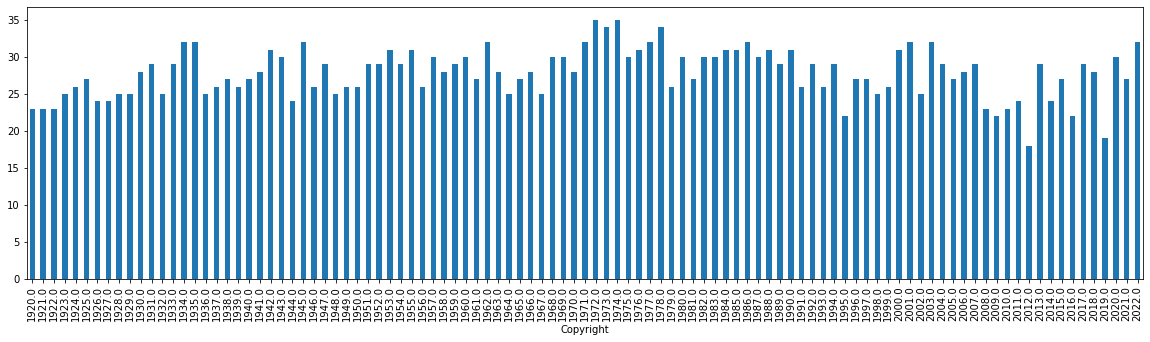

In [89]:
rezie[(rezie["Typologie"] == "hraný") & (rezie["Délka"] == "dlouhometrážní")].groupby("Copyright")["Věk"].min().plot.bar(figsize=(20,5))

### Režie: další pikošky

In [90]:
odrezirovano = pd.Series(rezie.groupby("Režie")["Film"].nunique(), name="Odrežírováno")

In [91]:
rezie = rezie.merge(odrezirovano, on="Režie")

In [92]:
rezie[(rezie["Odrežírováno"] >= 10) & (rezie["Délka"] == "dlouhometrážní")].groupby("Režie")["Počet lidí"].mean().nlargest(10)

Režie
Ladislav Rychman (7892)     127.909091
Tomáš Vorel (106)           121.916667
Václav Matějka (29527)      119.214286
Oldřich Lipský (7883)       118.095238
Jan Svěrák (476)            111.200000
Karel Janák (16647)         111.125000
K. M. Walló (51350)         109.583333
Zdeněk Podskalský (4749)    107.722222
Juraj Herz (7875)           106.411765
Otakar Vávra (9507)         103.282609
Name: Počet lidí, dtype: float64

In [93]:
rezie[(rezie["Odrežírováno"] >= 10) & (rezie["Délka"] == "dlouhometrážní")].groupby("Režie")["Počet lidí"].median().nlargest(10)

Režie
Tomáš Vorel (106)          119.5
Jan Svěrák (476)           118.0
Karel Janák (16647)        117.5
Václav Matějka (29527)     117.0
Oldřich Lipský (7883)      111.0
K. M. Walló (51350)        109.5
Ladislav Rychman (7892)    103.0
Jaroslav Soukup (1171)     100.0
Juraj Herz (7875)           99.0
Zdeněk Troška (3874)        99.0
Name: Počet lidí, dtype: float64

In [94]:
rezie.explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(10)

Režie
Otakar Vávra (9507)        1993
Karel Kachyňa (3526)       1288
Oldřich Lipský (7883)      1114
Karel Steklý (35894)       1079
Zdeněk Troška (3874)        993
Juraj Herz (7875)           958
Dušan Klein (2568)          942
Václav Vorlíček (1044)      928
Ladislav Rychman (7892)     913
Martin Frič (20324)         913
Name: Hrají, dtype: int64

In [95]:
vavrovy_filmy = rezie[rezie["Režie"] == "Otakar Vávra (9507)"]["Film"].drop_duplicates().to_list()

In [96]:
pocet_hercu = df.explode("Hrají").groupby("Film")["Hrají"].nunique()

In [97]:
pocet_hercu.sort_values(ascending=False).head(10)

Film
Temné slunce (397277)                428
Putování Jana Amose (397429)         280
Dny zrady (396979)                   279
Osvobození Prahy (397108)            246
Hvězda padá vzhůru (397037)          242
Lásky mezi kapkami deště (397232)    234
Dáma na kolejích (396710)            210
Ztraceni v ráji (402237)             203
Kdyby tisíc klarinetů (396600)       199
Vítězný lid (397143)                 175
Name: Hrají, dtype: int64

In [98]:
pocet_hercu[pocet_hercu.index.isin(vavrovy_filmy)].sort_values(ascending=False)

Film
Temné slunce (397277)                                                     428
Putování Jana Amose (397429)                                              280
Dny zrady (396979)                                                        279
Osvobození Prahy (397108)                                                 246
Oldřich a Božena (397442)                                                 134
Sokolovo (397045)                                                         127
Komediant (397445)                                                        100
Příběh lásky a cti (397153)                                                95
Rozina sebranec (396007)                                                   73
Jan Žižka (396216)                                                         73
Jan Hus (396186)                                                           71
Kladivo na čarodějnice (396831)                                            70
Evropa tančila valčík (397641)                             

In [99]:
nejobsazovanejsi = df.explode("Hrají").groupby("Hrají")["Film"].nunique().nlargest(1000).index.to_list()
df_nejobsazovanejsi = df.explode("Hrají")
df_nejobsazovanejsi = df_nejobsazovanejsi[df_nejobsazovanejsi["Hrají"].isin(nejobsazovanejsi)]
df_nejobsazovanejsi.explode("Režie").groupby("Režie")["Hrají"].nunique().nlargest(10)

Režie
Otakar Vávra (9507)       510
Martin Frič (20324)       432
Karel Steklý (35894)      405
Karel Kachyňa (3526)      398
Václav Vorlíček (1044)    360
Oldřich Lipský (7883)     349
Ivo Novák (7889)          344
Vladimír Čech (7871)      321
Miroslav Cikán (31969)    319
Dušan Klein (2568)        316
Name: Hrají, dtype: int64

In [100]:
df.explode("Režie").explode("Žánr").groupby("Režie")["Žánr"].nunique().nlargest(10)

Režie
Martin Frič (20324)           26
Otakar Vávra (9507)           25
Evald Schorm (7895)           23
Věra Chytilová (1555)         23
Karel Kachyňa (3526)          19
F. A. Brabec (5610)           18
Elmar Klos (4742)             16
Jaromil Jireš (5317)          16
None                          16
Svatopluk Innemann (33860)    16
Name: Žánr, dtype: int64

In [101]:
df.explode("Režie").explode("Žánr").groupby(["Režie","Žánr"])["Film"].nunique().nlargest(10)

Režie                       Žánr    
None                        reklamní    108
Martin Frič (20324)         komedie      45
Jan Kříženecký (127419)     reportáž     37
Vladimír Slavínský (31967)  komedie      35
Karel Dodal (127380)        reklamní     34
Miroslav Cikán (31969)      komedie      30
Hermína Týrlová (4754)      pohádka      27
Irena Dodalová (78759)      reklamní     27
Otakar Vávra (9507)         drama        24
Martin Frič (20324)         drama        23
Name: Film, dtype: int64

In [102]:
rezie.explode("Scénář").groupby("Režie")["Scénář"].nunique().nlargest(10)

Režie
Martin Frič (20324)           72
Tomáš Vorel (106)             57
Miroslav Cikán (31969)        42
Václav Binovec (37467)        42
Vladimír Čech (7871)          40
Svatopluk Innemann (33860)    36
Karel Kachyňa (3526)          30
Oldřich Lipský (7883)         29
Karel Lamač (37847)           28
Otakar Vávra (9507)           28
Name: Scénář, dtype: int64

In [103]:
rezie.explode("Kamera").groupby("Režie")["Kamera"].nunique().nlargest(10)

Režie
Otakar Vávra (9507)         79
J. A. Holman (37290)        62
Michael Kocáb (9669)        38
David Sís (10869)           37
Martin Frič (20324)         32
Helena Třeštíková (709)     30
Miroslav Janek (536)        30
Vladimír Škultéty (7223)    30
Václav Kubásek (37286)      28
Pavel Abrahám (19039)       27
Name: Kamera, dtype: int64

In [104]:
rezie[rezie["Režie"] == "J. A. Holman"]["Kamera"].to_list()

[]

In [105]:
rezie[rezie["Režie"].str.contains("/ž/")]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Počet hrají,Lidé,Počet lidí,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk,Odrežírováno


In [106]:
rezie[rezie["Režie"] == "Otakar Vávra"]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Počet hrají,Lidé,Počet lidí,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk,Odrežírováno


In [107]:
df.explode("Režie").explode("Dirigent").groupby("Režie")["Dirigent"].nunique().nlargest(10)

Režie
Jan Hřebejk (4831)       7
Petr Nikolaev (540)      6
Viktor Polesný (7797)    5
Dušan Klein (2568)       3
Filip Renč (558)         3
Jiří Vejdělek (24168)    3
Tomáš Vorel (106)        3
F. A. Brabec (5610)      2
Hynek Bočan (2947)       2
Jan Svěrák (476)         2
Name: Dirigent, dtype: int64

In [108]:
df.explode("Režie").explode("Střih").groupby("Režie")["Střih"].nunique().nlargest(10)

Režie
K. M. Walló (51350)          19
Břetislav Pojar (3113)       17
Karel Vachek (565)           17
David Čálek (495)            16
Tomáš Vorel (106)            13
Věra Chytilová (1555)        13
Evald Schorm (7895)          12
Karel Kachyňa (3526)         12
Milan Cieslar (3593)         12
Vlasta Pospíšilová (4386)    12
Name: Střih, dtype: int64

In [109]:
df.explode("Režie").explode("Pomocná režie").groupby("Režie")["Pomocná režie"].nunique().nlargest(10)

Režie
K. M. Walló (51350)          25
Otakar Vávra (9507)          23
Karel Kachyňa (3526)         20
Pavel Abrahám (19039)        20
Agnieszka Holland (12106)    18
Jindřich Polák (7891)        18
Jaromil Jireš (5317)         17
Jiří Hanibal (7873)          17
Ivo Novák (7889)             15
Václav Matějka (29527)       15
Name: Pomocná režie, dtype: int64

In [110]:
df.explode("Kamera").explode("Hrají").groupby("Kamera")["Hrají"].nunique().nlargest(10)

Kamera
Vladimír Smutný (1772)    1733
Jaromír Šofr (4285)       1671
Josef Illík (12730)       1637
Jan Čuřík (4946)          1500
Jiří Macháně (11743)      1469
Ivan Šlapeta (2968)       1419
Josef Vaniš (9510)        1419
Jiří Macák (1725)         1389
Jan Stallich (126242)     1298
Viktor Růžička (10079)    1252
Name: Hrají, dtype: int64

In [111]:
kariery_reziseru = pd.Series(df.explode("Režie").groupby("Režie")["Copyright"].max() -df.explode("Režie").groupby("Režie")["Copyright"].min(), name="Kariéry režisérů")

In [112]:
kariery_reziseru.sort_values(ascending=False).nlargest(15)

Režie
Břetislav Pojar (3113)       60
Karel Vachek (565)           59
Otakar Vávra (9507)          59
Hermína Týrlová (4754)       58
Václav Vorlíček (1044)       57
Jan Němec (3041)             56
Dušan Klein (2568)           55
Jiří Menzel (7887)           52
Agnieszka Holland (12106)    51
Jan Švankmajer (406)         50
Karel Kachyňa (3526)         50
Vojtěch Jasný (4666)         50
Věra Chytilová (1555)        47
Miloš Forman (7872)          46
František Filip (7822)       46
Name: Kariéry režisérů, dtype: int64

<Axes: ylabel='Frequency'>

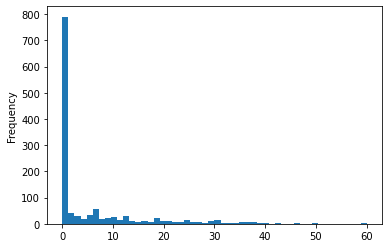

In [113]:
kariery_reziseru.plot.hist(bins=50)

In [114]:
df[(df["Copyright"] > 1918) & (df["Copyright"] < 1939)].explode("Režie").explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(5)

Režie
Svatopluk Innemann (33860)    486
Martin Frič (20324)           416
Vladimír Slavínský (31967)    367
Václav Binovec (37467)        351
Karel Lamač (37847)           330
Name: Hrají, dtype: int64

In [115]:
df[(df["Copyright"] > 1918) & (df["Copyright"] < 1939)].explode("Režie").groupby("Režie")["Film"].nunique().nlargest(5)

Režie
None                          127
Svatopluk Innemann (33860)     45
Karel Dodal (127380)           42
Karel Lamač (37847)            35
Martin Frič (20324)            35
Name: Film, dtype: int64

In [116]:
df[(df["Copyright"] >= 1939) & (df["Copyright"] <= 1944)].explode("Režie").explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(5)

Režie
Miroslav Cikán (31969)        242
Martin Frič (20324)           240
Vladimír Slavínský (31967)    225
Otakar Vávra (9507)           189
František Čáp (13530)         183
Name: Hrají, dtype: int64

In [117]:
df[(df["Copyright"] >= 1939) & (df["Copyright"] <= 1944)].explode("Režie").groupby("Režie")["Film"].nunique().nlargest(5)

Režie
Martin Frič (20324)           19
Miroslav Cikán (31969)        17
Vladimír Slavínský (31967)    13
Otakar Vávra (9507)           12
František Čáp (13530)         10
Name: Film, dtype: int64

In [118]:
df[(df["Copyright"] >= 1945) & (df["Copyright"] <= 1989)].explode("Režie").explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(5)

Režie
Otakar Vávra (9507)        1843
Karel Kachyňa (3526)       1173
Oldřich Lipský (7883)      1114
Karel Steklý (35894)       1074
Ladislav Rychman (7892)     913
Name: Hrají, dtype: int64

In [119]:
df[(df["Copyright"] >= 1945) & (df["Copyright"] <= 1989)].explode("Režie").groupby("Režie")["Film"].nunique().nlargest(5)

Režie
Karel Kachyňa (3526)      42
Hermína Týrlová (4754)    35
Otakar Vávra (9507)       34
Jindřich Polák (7891)     30
Martin Frič (20324)       28
Name: Film, dtype: int64

In [120]:
rezie[rezie["Typologie"] == "hraný"].groupby("Režie")["Minutáž"].sum().nlargest(20).apply(lambda x: x/60)

Režie
Martin Frič (20324)             117.133333
Vladimír Slavínský (31967)       79.066667
Otakar Vávra (9507)              74.533333
Miroslav Cikán (31969)           69.433333
Karel Kachyňa (3526)             65.950000
Svatopluk Innemann (33860)       62.333333
Václav Kubásek (37286)           52.300000
Václav Binovec (37467)           47.066667
Karel Lamač (37847)              46.050000
Zdeněk Troška (3874)             43.383333
Karel Steklý (35894)             41.900000
Vladimír Čech (7871)             40.233333
Dušan Klein (2568)               39.850000
Václav Vorlíček (1044)           39.333333
Václav Krška (20325)             38.083333
Jan Hřebejk (4831)               35.633333
Jindřich Polák (7891)            33.883333
Miroslav J. Krňanský (54169)     33.416667
Oldřich Lipský (7883)            33.350000
Jiří Hanibal (7873)              33.233333
Name: Minutáž, dtype: float64

### Režiséři & éry

In [121]:
ery = {
    "R-U": [1898, 1918],
    "19-38": [1919, 1938],
    "39-45": [1939, 1944],
    "45-47": [1945, 1947],
    "48-68": [1948, 1968],
    "69-89": [1969, 1989],
    "90-92": [1990, 1992],
    "93-23": [1993, 2023]
}

In [122]:
rezie[rezie["Režie"] == "Hermína Týrlová (4754)"]["Copyright"].max()

1986.0

In [123]:
for key, val in ery.items():
    print(key)
    print(rezie[(rezie["Copyright"] >= val[0]) & (rezie["Copyright"] <= val[1])].groupby("Režie")["Film"].nunique().nlargest(3))

R-U
Režie
Jan Kříženecký (127419)    42
Max Urban (95056)          12
Antonín Pech (99760)       11
Name: Film, dtype: int64
19-38
Režie
None                          127
Svatopluk Innemann (33860)     45
Karel Dodal (127380)           42
Name: Film, dtype: int64
39-45
Režie
Martin Frič (20324)           19
Miroslav Cikán (31969)        17
Vladimír Slavínský (31967)    13
Name: Film, dtype: int64
45-47
Režie
Jiří Trnka (28391)       6
Otakar Vávra (9507)      6
František Čáp (13530)    5
Name: Film, dtype: int64
48-68
Režie
Martin Frič (20324)    25
Jiří Trnka (28391)     21
Evald Schorm (7895)    20
Name: Film, dtype: int64
69-89
Režie
Karel Kachyňa (3526)     25
Jindřich Polák (7891)    23
Dušan Klein (2568)       16
Name: Film, dtype: int64
90-92
Režie
Věra Chytilová (1555)    3
Bohdan Sláma (926)       2
Hynek Bočan (2947)       2
Name: Film, dtype: int64
93-23
Režie
Jan Hřebejk (4831)         21
Zdeněk Troška (3874)       17
Helena Třeštíková (709)    12
Name: Film, dtype: int64


In [124]:
def v_ere(x):
    global ery
    for key, val in ery.items():
        if x >= val[0]:
            if x <= val [1]:
                return key

In [125]:
rezie["Éra"] = rezie["Copyright"].apply(v_ere)

In [126]:
rezie.groupby("Režie")["Éra"].nunique().nlargest()

Režie
Elmar Klos (4742)            5
Hermína Týrlová (4754)       5
Otakar Vávra (9507)          5
Bohumil Vošahlík (127436)    4
Bořivoj Zeman (8886)         4
Name: Éra, dtype: int64

## Náměty

In [127]:
namety = df.explode("Původní filmový námět")

In [128]:
namety[(namety["Původní filmový námět"] == "Ota Hofman (126062)") & (namety["Délka"] == "dlouhometrážní")]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Počet hrají,Lidé,Počet lidí
1396,Punťa a čtyřlístek (396221),Československo,1954,1954,"premiéra 15. 4. 1955 /přístupný mládeži/ (kina Moskva /6 týdnů/, Revoluce /1 týden od 29. 4./, Oko /1 týden od 6. 5./ a Arbes /1 týden od 13. 5./, Praha)",94.0,[Jiří Weiss (9518)],film,dětský,"[hraný, distribuční]",Punťa a čtyřlístek,Punťa a čtyřlístek,Doggy and the Four,None,None,"[Josef Bek (4865), Jarmila Smejkalová (21233), Aleš Košnar (13190), Nataša Gollová (36491), Václav Postránecký (7956), Ema Skálová (78079), František Roland (127484), Zdeněk Dítě (5313), Miroslav Koukal, Radovan Lukavský (3301), Věra Srbková, Rudolf Deyl ml. (126471), Vladimír Pucholt (22266), Běla Jurdová (27291), Jiří Vršťala (5193), Miloš Vavruška (25435), Jan Maška (126431), Gustav Heverle (16508), Rudolf Princ (128818), Rudolf Křivánek, Dáša Neblechová (126566), Libuše Matějová (126833), Karla Svobodová (129142), Jarmila Pucholtová, Čestmír Studna, Věra Kleinhamplová (131496), Libuše Zemková (129726), Ruppert Dubský, V. Bobková, J. Turek, J. Holub, J. Šubrt, J. Vacek (124675), Z. Chalupník, J. Zelenka, V. Mikulášková, pes Broček]","[advokát JUDr. František Burda, Helena, Burdova žena, Toník, syn Burdových, Marie Prouzová, Karel, syn Prouzové, Karlova tetička Růžena, rozzlobený penzista, strážmistr SNB Šimek, Pepík, Šimkův syn, železničář Svoboda, Lidka Čermáková, majitelka Punti, učitel Hořejší, žák, prodavačka v hračkářství, příslušník SNB, příslušník SNB, příslušník SNB, velitel SNB, úředník na ONV, příslušník SNB Bureš, maminka Čermáková, úřednice, Helenka, dcera Burdových, žákyně, kluk, dívka, foxteriér Punťa vlastním jménem Asťa]",[Bohumil Svoboda (12732)],"[Milada Řeháková, Alena Nová]",Ota Hofman (126062),"[Ota Hofman (126062), Jiří Weiss (9518)]",None,[Jaroslav Tuzar (127332)],[Adolf Hejzlar (130306)],[Bohuslav Kulič (125884)],[Karel Postřehovský (73049)],"[Josef Mann (18269), Anna Mátlová (128675)]",[Miroslav Hájek (54607)],[Emil Poledník (18333)],None,[Josef Ouzký (126337)],[Vratislav Innemann (128062)],[Václav Chmelíř],[64086],None,[],Ztratil se pes a co z toho bylo.,[Studio uměleckého filmu (124800)],None,[Národní filmový archiv (92324)],[Rozdělovna filmů Československého státního filmu (127502)],dlouhometrážní,"[16mm, 35mm]",1.37,barevný,zvukový,mono,česká,česky,b

In [129]:
namety.groupby("Původní filmový námět")["Film"].nunique().nlargest(10)

Původní filmový námět
Ota Hofman (126062)            47
Jan Procházka (34081)          28
Hermína Týrlová (4754)         23
František Vlček st. (87095)    22
Miloš Macourek (1045)          22
Jindřich Polák (7891)          21
Vladimír Kalina (4895)         21
Karel Steklý (35894)           18
Otakar Vávra (9507)            18
Věra Chytilová (1555)          18
Name: Film, dtype: int64

## Všichni lidé

In [130]:
vslide = df[["Film","Lidé","Copyright"]].explode("Lidé")

In [131]:
vslide = vslide.merge(persony[["Jméno","Rok úmrtí"]], left_on = "Lidé", right_on = "Jméno")

In [132]:
vslide = vslide[vslide["Copyright"] <= vslide["Rok úmrtí"]]

In [133]:
pd.Series(vslide.groupby("Lidé")["Copyright"].max() - vslide.groupby("Lidé")["Copyright"].min()).nlargest(50)

Lidé
Otakar Vávra (9507)           80
Zdenka Procházková (42989)    75
Zita Kabátová (839)           73
Jára Kohout (4846)            72
Soňa Červená (10930)          72
František Kovářík (126912)    70
Miloš Nesvadba (16509)        70
Svatopluk Beneš (13617)       69
Jaroslava Adamová (11226)     68
Břetislav Pojar (3113)        67
Jiří Krejčík (7882)           67
Lubomír Lipský (9728)         67
Vladimír Brabec (3858)        67
Vladimír Hlavatý (34999)      67
Václav Vorlíček (1044)        67
Antonie Hegerliková (7721)    66
Ivo Niederle (6134)           66
Jana Štěpánková (14419)       66
Josef A. Stehlík (24492)      66
Ladislav Matějka (123516)     66
Ladislav Mrkvička (6298)      66
Václav Postránecký (7956)     66
Anny Ondráková (127280)       65
Fan Vavřincová (35092)        65
Hana Hegerová (13526)         65
Ladislav Trojan (10040)       65
Petr Skoumal (1249)           65
Stanislav Fišer (5344)        65
Helena Růžičková (3862)       64
Luba Skořepová (2937)         64
Vlast

In [134]:
scenare = df.explode("Scénář")

In [135]:
scenare.groupby("Scénář")["Film"].nunique().nlargest(10)

Scénář
Václav Wasserman (37326)      82
Otakar Vávra (9507)           67
Ota Hofman (126062)           64
Karel Steklý (35894)          60
Josef Neuberg (127301)        45
Vladimír Slavínský (31967)    45
Karel Kachyňa (3526)          42
Jiří Brdečka (18026)          39
Elmar Klos (4742)             37
Jan Procházka (34081)         37
Name: Film, dtype: int64

## Komba a auterstvo

In [136]:
tvurci = df.explode("Režie").explode("Scénář").explode("Původní filmový námět").explode("Typologie")

In [137]:
tvurci = tvurci[(tvurci["Typologie"] == "hraný") & (tvurci["Délka"] == "dlouhometrážní")]

In [138]:
tvurci.groupby(["Režie","Scénář","Původní filmový námět"])["Film"].nunique().nlargest(10)

Režie                       Scénář                      Původní filmový námět     
Karel Steklý (35894)        Karel Steklý (35894)        Karel Steklý (35894)          12
Věra Plívová-Šimková (186)  Věra Plívová-Šimková (186)  Věra Plívová-Šimková (186)    12
Zdeněk Troška (3874)        Zdeněk Troška (3874)        Zdeněk Troška (3874)          12
Karel Kachyňa (3526)        Jan Procházka (34081)       Jan Procházka (34081)         11
                            Karel Kachyňa (3526)        Jan Procházka (34081)         11
Petr Schulhoff (7896)       Petr Schulhoff (7896)       Petr Schulhoff (7896)         10
Václav Vorlíček (1044)      Miloš Macourek (1045)       Miloš Macourek (1045)         10
Jan Hřebejk (4831)          Petr Jarchovský (2075)      Petr Jarchovský (2075)         9
Jindřich Polák (7891)       Jindřich Polák (7891)       Ota Hofman (126062)            9
Jiří Hanibal (7873)         Jiří Hanibal (7873)         Jiří Hanibal (7873)            9
Name: Film, dtype: int64

In [139]:
autorske = tvurci[(tvurci["Režie"] == tvurci["Scénář"]) & (tvurci["Scénář"] == tvurci["Původní filmový námět"])]
autorske.groupby("Režie")["Film"].nunique().nlargest(10)

Režie
Karel Steklý (35894)          12
Věra Plívová-Šimková (186)    12
Zdeněk Troška (3874)          12
Petr Schulhoff (7896)         10
Jiří Hanibal (7873)            9
Věra Chytilová (1555)          9
Jaroslav Soukup (1171)         8
Oldřich Lipský (7883)          8
Otakar Vávra (9507)            8
Jaroslav Papoušek (4930)       7
Name: Film, dtype: int64

In [140]:
for key, val in ery.items():
    print(key)
    print(autorske[(autorske["Copyright"] >= val[0]) & (autorske["Copyright"] <= val[1])].groupby("Režie")["Film"].nunique().nlargest(3))

R-U
Series([], Name: Film, dtype: int64)
19-38
Režie
Vladimír Slavínský (31967)       6
Karel Lamač (37847)              5
Hans Otto Löwenstein (127824)    3
Name: Film, dtype: int64
39-45
Režie
Miroslav Cikán (31969)        4
Vladimír Slavínský (31967)    1
Václav Krška (20325)          1
Name: Film, dtype: int64
45-47
Režie
Václav Krška (20325)    2
Josef Mach (7885)       1
Martin Frič (20324)     1
Name: Film, dtype: int64
48-68
Režie
Bořivoj Zeman (8886)    4
Jiří Sequens (7893)     4
Karel Zeman (37288)     4
Name: Film, dtype: int64
69-89
Režie
Věra Plívová-Šimková (186)    10
Karel Steklý (35894)           9
Petr Schulhoff (7896)          9
Name: Film, dtype: int64
90-92
Režie
František Fenič (608)      1
Hynek Bočan (2947)         1
Irena Pavlásková (1724)    1
Name: Film, dtype: int64
93-23
Režie
Zdeněk Troška (3874)    9
Tomáš Vorel (106)       6
Martin Šulík (5432)     5
Name: Film, dtype: int64


In [141]:
tvurci["Hlavní role"] = tvurci["Hrají"].apply(lambda x: x[0:3] if x else None)

In [142]:
tvurci = tvurci.explode("Hlavní role").explode("Hrají")

In [143]:
tvurci.groupby(["Režie","Scénář","Původní filmový námět","Hlavní role"])["Film"].nunique().nlargest(10)

Režie                     Scénář                     Původní filmový námět      Hlavní role            
Karel Lamač (37847)       Karel Lamač (37847)        Karel Lamač (37847)        Karel Lamač (37847)        5
Dušan Klein (2568)        Ladislav Pecháček (17135)  Ladislav Pecháček (17135)  Pavel Kříž (2990)          4
Jaroslav Papoušek (4930)  Jaroslav Papoušek (4930)   Jaroslav Papoušek (4930)   Josef Šebánek (69908)      4
Jindřich Polák (7891)     Jindřich Polák (7891)      Ota Hofman (126062)        Žaneta Fuchsová (36216)    4
                          Ota Hofman (126062)        Ota Hofman (126062)        Žaneta Fuchsová (36216)    4
Karel Lamač (37847)       Karel Lamač (37847)        Karel Lamač (37847)        Anny Ondráková (127280)    4
Martin Frič (20324)       Hugo Haas (37289)          Hugo Haas (37289)          Hugo Haas (37289)          4
Milan Vošmik (31970)      Ota Hofman (126062)        Ota Hofman (126062)        Jaroslav Vízner (27247)    4
                        

In [144]:
tvurci.groupby(["Režie","Scénář","Původní filmový námět","Hrají"])["Film"].nunique().nlargest(10)

Režie                       Scénář                      Původní filmový námět       Hrají                  
Karel Steklý (35894)        Karel Steklý (35894)        Karel Steklý (35894)        Miloslav Homola (18975)    8
                                                                                    Oldřich Velen (12725)      8
Petr Schulhoff (7896)       Petr Schulhoff (7896)       Petr Schulhoff (7896)       Jiřina Bílá (3629)         8
Jindřich Polák (7891)       Ota Hofman (126062)         Ota Hofman (126062)         Otto Šimánek (35353)       7
Karel Steklý (35894)        Karel Steklý (35894)        Karel Steklý (35894)        Jiří Lír (4926)            7
                                                                                    Karel Hábl (27177)         7
Oldřich Lipský (7883)       Oldřich Lipský (7883)       Oldřich Lipský (7883)       Miloš Kopecký (4959)       7
Tomáš Vorel (106)           Tomáš Vorel (106)           Tomáš Vorel (106)           Radomil Uhlíř (60

In [145]:
tvurci[tvurci["Copyright"] > 1945].groupby(["Režie","Hrají"])["Film"].nunique().nlargest(10)

Režie                   Hrají                   
Karel Steklý (35894)    Oldřich Velen (12725)       16
Oldřich Lipský (7883)   Lubomír Lipský (9728)       15
Martin Frič (20324)     Bohuš Hradil (128758)       14
Vladimír Čech (7871)    Oldřich Velen (12725)       14
Dušan Klein (2568)      Josef Somr (1054)           13
Oldřich Lipský (7883)   Josef Hlinomaz (26212)      13
                        Miloš Kopecký (4959)        13
Vladimír Čech (7871)    Miloš Vavruška (25435)      13
Václav Vorlíček (1044)  Oldřich Velen (12725)       13
                        Vladimír Menšík (126036)    13
Name: Film, dtype: int64

## Top lidé v jednotlivých profesích

In [ ]:
nejproduktivnejsi = {}
for p in profese:
    df_pracovni = df[["Film",p]].explode(p)
    df_pracovni = df_pracovni[~df_pracovni[p].isnull()]
    df_pracovni = df_pracovni[~df_pracovni[p].isin(nelide)]
    vyrez = df_pracovni.groupby(p)["Film"].nunique().nlargest(1)
    nejproduktivnejsi[p] = [vyrez.index.array[0], vyrez[0].astype(int)]
    print(df_pracovni.groupby(p)["Film"].nunique().nlargest(6))
    print("***")

Animace
Hermína Týrlová (4754)             38
Stanislav Látal (4849)             22
Bohuslav Šrámek (129804)           21
Alfons Mensdorff-Pouilly (8768)    17
Jan Karpaš (125275)                17
Jan Dudešek (54248)                16
Name: Film, dtype: int64
***
Architekt
Štěpán Kopecký (127347)       142
Jan Zázvorka (28108)          135
Alois Mecera (127364)         110
Oldřich Bosák (4942)           93
Karel Škvor (81834)            82
Vilém Rittershain (127306)     80
Name: Film, dtype: int64
***
Asistent kamery
Václav Zajíček (10832)      54
Bohumil Vodička (126011)    53
Vojtěch Kuthan (18310)      52
Ivan Šimůnek (3259)         51
Jiří Zavřel (2408)          41
Emil Hora (88957)           40
Name: Film, dtype: int64
***
Asistent režie
Rudolf Stahl st. (127315)    46
Antonín Kubový (127325)      38
Eduard Šimáček (127361)      33
Robert Vacík (55068)         27
Walter Schorsch (51567)      27
Josef Zezulka (128426)       25
Name: Film, dtype: int64
***
Asistent střihu
Růžena He

In [ ]:
nejproduktivnejsi_zijici = {}
for p in profese:
    df_pracovni = df[["Film",p]].explode(p)
    df_pracovni = df_pracovni[~df_pracovni[p].isnull()]
    df_pracovni = df_pracovni[~df_pracovni[p].isin(nelide)]
    df_pracovni = df_pracovni[df_pracovni[p].isin(zijici)]
    vyrez = df_pracovni.groupby(p)["Film"].nunique().nlargest(1)
    nejproduktivnejsi_zijici[p] = [vyrez.index.array[0], vyrez[0].astype(int)]
    print(df_pracovni.groupby(p)["Film"].nunique().nlargest(6))
    print("***")

In [ ]:
pd.DataFrame.from_dict(nejproduktivnejsi, orient="index").rename(columns={0: "Jméno", 1: "Počet filmů"}).sort_values(by="Počet filmů", ascending=False)

## Nejčastější člověk vůbec

In [ ]:
nejcastejsi = df[["Film","Lidé"]].explode("Lidé")
nejcastejsi["Gender"] = nejcastejsi["Lidé"].apply(lambda x: gender(x, zeny, nelide))

In [ ]:
nej2 = pd.DataFrame(nejcastejsi.groupby(["Lidé"])["Film"].nunique()).rename(columns={"Film": "Filmů"})

In [ ]:
nej2 = nej2.merge(persony, left_on="Lidé", right_on="Jméno")

In [ ]:
nej2.sort_values(by="Filmů", ascending=False).head(10)

In [ ]:
nej2[nej2["Medailon"].str[0:4] != "here"][["Jméno","Medailon","Filmů","Rok narození","Rok úmrtí"]].drop_duplicates().sort_values(by="Filmů", ascending=False).head(10)

In [ ]:
profese

In [ ]:
komedianti = ["Hrají","Mluví","Zpívají","Účinkují"]

In [ ]:
profese2 = [x for x in profese if x not in komedianti]

In [ ]:
df["Lidé bez herců"] = df[profese2].values.tolist()
df["Lidé bez herců"] = df["Lidé bez herců"].apply(lambda x: plose_jednoduse(x))

In [ ]:
nej3 = pd.DataFrame(df[["Lidé bez herců","Film"]].explode("Lidé bez herců").groupby(["Lidé bez herců"])["Film"].nunique()).rename(columns={"Film": "Filmů"}).drop_duplicates()

In [ ]:
nej3 = nej3.merge(persony, left_on="Lidé bez herců", right_on="Jméno").drop_duplicates()

In [ ]:
nej3[["Jméno","Medailon","Filmů","Rok narození","Rok úmrtí"]].sort_values(by="Filmů",ascending=False).head(10)

In [ ]:
tabulka(nej3[["Jméno","Filmů","Rok narození","Rok úmrtí"]].sort_values(by="Filmů",ascending=False).head(10), bez_tecky=["Rok narození","Rok úmrtí"], poradi=False, bez_zavorek=True)

In [ ]:
pokusny_df = nej3[["Jméno","Medailon","Filmů","Rok narození","Rok úmrtí"]].sort_values(by="Filmů",ascending=False).head(10)
pokusny_df["Procky"] = pokusny_df["Filmů"] / pokusny_df["Rok narození"]
pokusny_df = pokusny_df[["Jméno","Procky"]]

In [ ]:
pokusny_df

In [ ]:
tabulka(pokusny_df, na_procenta=["Procky"], bez_zavorek=True)

In [ ]:
strih = df[["Film","Copyright","Střih"]].explode("Střih")
pd.Series(strih[strih["Střih"] == "Miroslav Hájek (54607)"].groupby("Copyright")["Film"].nunique()).plot.bar()

In [ ]:
zvuk = df[["Film","Copyright","Zvuk"]].explode("Zvuk")
pd.Series(zvuk[zvuk["Zvuk"] == "Bohumír Brunclík (126058)"].groupby("Copyright")["Film"].nunique()).plot.bar()

In [ ]:
zvuk[zvuk["Zvuk"] == "Bohumír Brunclík (126058)"].groupby("Copyright")["Film"].nunique().max()

In [ ]:
strih[strih["Střih"] == "Miroslav Hájek (54607)"].groupby("Copyright")["Film"].nunique().max()

In [ ]:
nejcastejsi[nejcastejsi["Gender"] == "žena"].groupby("Lidé")["Film"].nunique().nlargest(10)

In [ ]:
najdi_cloveka("Zuzana Vrbová (7187)")

In [ ]:
najdi_cloveka("Miroslav Hájek (54607)")

In [ ]:
najdi_cloveka("Antonín Zelenka (4758)")

In [ ]:
najdi_cloveka("Willy Ströminger (55487)")

In [ ]:
nejcastejsi = df[df["Copyright"] >= 1945][["Film","Lidé"]]
nejcastejsi.explode("Lidé").groupby("Lidé")["Film"].nunique().nlargest(10)

In [ ]:
nejcastejsi_seznam = [x for x in df[["Film","Lidé"]].explode("Lidé").groupby("Lidé")["Film"].nunique().nlargest(1000).index.to_list() if x not in nelide]

In [ ]:
with open(os.path.join("data_fixes", "1000nejcastejsich.json"), "w+", encoding="utf-8") as top:
    json.dump(nejcastejsi_seznam, top)

## Oskarové filmy

In [ ]:
nejcastejsi = df[df["Film"].isin(seznamy["oskari"])][["Film","Lidé"]]
nejcastejsi.explode("Lidé").groupby("Lidé")["Film"].nunique().nlargest(10)

In [ ]:
nejcastejsi = df[df["Film"].isin(seznamy["oskarianominace"])][["Film","Lidé"]]
nejcastejsi.explode("Lidé").groupby("Lidé")["Film"].nunique().nlargest(10)

## Normalizace

In [ ]:
lide_normalizacniho_filmu = df[(df["Copyright"] >= 1972) & (df["Copyright"] <= 1989)]["Lidé"].explode("Lidé").drop_duplicates().to_list()

In [ ]:
lide = persony[persony["Osoba"] == "fyzická"]["Jméno"].to_list()

In [ ]:
mrtvi = persony[(persony["Rok úmrtí"] < 1990) | persony["Rok úmrtí"].isnull()]["Jméno"].to_list()
mrtvi

In [ ]:
lide_prednormalizacniho_filmu = df[(df["Copyright"] < 1972)]["Lidé"].explode("Lidé").drop_duplicates().to_list()
lide_postnormalizacniho_filmu = df[(df["Copyright"] > 1989)]["Lidé"].explode("Lidé").drop_duplicates().to_list()
lide_nenormalizacniho_filmu = [x for x in lide_prednormalizacniho_filmu if x in lide_postnormalizacniho_filmu]

In [ ]:
nemohli_natacet = [x for x in lide_nenormalizacniho_filmu if x not in lide_normalizacniho_filmu]
nemohli_natacet = [x for x in nemohli_natacet if x in lide]
nemohli_natacet = [x for x in nemohli_natacet if x not in mrtvi]
nemohli_natacet

In [ ]:
len(nemohli_natacet)

In [ ]:
rezie[rezie["Režie"].isin(nemohli_natacet)].groupby("Režie")["Film"].nunique().nlargest(15)

In [ ]:
tvurci[tvurci["Scénář"].isin(nemohli_natacet)].groupby("Scénář")["Film"].nunique().nlargest(10)

In [ ]:
df = vycisti(pd.read_json(os.path.join("data", "filmy.json")), opravy)

In [ ]:
for p in profese:
    df_pracovni = df[["Film",p]].explode(p)
    df_pracovni = df_pracovni[df_pracovni[p].isin(nemohli_natacet)] 
    print(df_pracovni.groupby(p)["Film"].nunique().nlargest(2))
    print("***")

In [ ]:
rezie[rezie["Režie"].isin(nemohli_natacet)].groupby("Copyright")["Film"].nunique().plot.bar(figsize=(20,5))

### Druhý pohled a raději s čistou databází

In [ ]:
df = vycisti(pd.read_json(os.path.join("data", "filmy.json")), opravy)

In [ ]:
df["Lidé"] = df[profese].values.tolist()
df["Lidé"] = df["Lidé"].apply(lambda x: plose_jednoduse(x))

In [ ]:
filmovi_lide = df[["Copyright","Film","Lidé"]].explode("Lidé")
filmovi_lide = filmovi_lide[~filmovi_lide["Lidé"].isin(nelide)]
kolik_filmu = pd.Series(filmovi_lide.groupby("Lidé")["Film"].nunique(), name="Filmů")
filmovi_lide = filmovi_lide.merge(kolik_filmu, on="Lidé")

In [ ]:
posledni_film = pd.Series(filmovi_lide.groupby("Lidé")["Copyright"].max(), name="Poslední")
filmovi_lide = filmovi_lide.merge(posledni_film, on="Lidé")

In [ ]:
filmovi_lide

In [ ]:
filmovi_lide = filmovi_lide.merge(persony, left_on = "Lidé", right_on = "Jméno")

In [ ]:
filmovi_lide = filmovi_lide[filmovi_lide["Osoba"] == "fyzická"]

In [ ]:
filmovi_lide = filmovi_lide[(filmovi_lide["Copyright"] <= filmovi_lide["Rok úmrtí"]) | (filmovi_lide["Rok úmrtí"].isnull())]

In [ ]:
filmovi_lide = filmovi_lide[filmovi_lide["Filmů"] >= 10]
filmovi_lide = filmovi_lide[filmovi_lide["Copyright"] < 2017]

In [ ]:
pd.Series(filmovi_lide[filmovi_lide["Poslední"] == filmovi_lide["Copyright"]].groupby("Copyright")["Lidé"].nunique() / filmovi_lide.groupby("Copyright")["Lidé"].nunique()).plot.bar(figsize=(20,5))

In [ ]:
pd.Series(filmovi_lide[filmovi_lide["Poslední"] == filmovi_lide["Copyright"]].groupby("Copyright")["Lidé"].nunique() / filmovi_lide.groupby("Copyright")["Lidé"].nunique()).nlargest(25)

## Filmů za rok

In [ ]:
filmovi_lide.shape

In [ ]:
filmovi_lide.groupby(["Lidé","Copyright"])["Film"].nunique().nlargest(10)

## Poslední lidé němého filmu

In [ ]:
nemy = df[df["Zvukový"] == "němý"]

In [ ]:
nemy.columns

In [ ]:
lide_nemeho_filmu = nemy.explode("Lidé")["Lidé"].drop_duplicates().to_list()

In [ ]:
persony[persony["Jméno"].isin(lide_nemeho_filmu)].sort_values("Rok úmrtí",ascending=False)